<a href="https://colab.research.google.com/github/kunwarsharik/SharikProjects/blob/master/3D_CNN_Human_Activity_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget http://www.nada.kth.se/cvap/actions/walking.zip
!wget http://www.nada.kth.se/cvap/actions/jogging.zip
!wget http://www.nada.kth.se/cvap/actions/running.zip
!wget http://www.nada.kth.se/cvap/actions/boxing.zip
!wget http://www.nada.kth.se/cvap/actions/handwaving.zip
!wget http://www.nada.kth.se/cvap/actions/handclapping.zip

In [0]:
ls

boxing.zip        handwaving.zip  running.zip   walking.zip
handclapping.zip  jogging.zip     sample_data/


In [0]:
!unzip walking.zip
!unzip jogging.zip
!unzip running.zip
!unzip boxing.zip
!unzip handwaving.zip
!unzip handclapping.zip

Archive:  walking.zip
  inflating: person01_walking_d1_uncomp.avi  
  inflating: person01_walking_d2_uncomp.avi  
  inflating: person01_walking_d3_uncomp.avi  
  inflating: person01_walking_d4_uncomp.avi  
  inflating: person02_walking_d1_uncomp.avi  
  inflating: person02_walking_d2_uncomp.avi  
  inflating: person02_walking_d3_uncomp.avi  
  inflating: person02_walking_d4_uncomp.avi  
  inflating: person03_walking_d1_uncomp.avi  
  inflating: person03_walking_d2_uncomp.avi  
  inflating: person03_walking_d3_uncomp.avi  
  inflating: person03_walking_d4_uncomp.avi  
  inflating: person04_walking_d1_uncomp.avi  
  inflating: person04_walking_d2_uncomp.avi  
  inflating: person04_walking_d3_uncomp.avi  
  inflating: person04_walking_d4_uncomp.avi  
  inflating: person05_walking_d1_uncomp.avi  
  inflating: person05_walking_d2_uncomp.avi  
  inflating: person05_walking_d3_uncomp.avi  
  inflating: person05_walking_d4_uncomp.avi  
  inflating: person06_walking_d1_uncomp.avi  
  inflating:

In [0]:
ls

boxing.zip                            person13_jogging_d1_uncomp.avi*
handclapping.zip                      person13_jogging_d2_uncomp.avi*
handwaving.zip                        person13_jogging_d3_uncomp.avi*
jogging.zip                           person13_jogging_d4_uncomp.avi*
person01_boxing_d1_uncomp.avi*        person13_running_d1_uncomp.avi*
person01_boxing_d2_uncomp.avi*        person13_running_d2_uncomp.avi*
person01_boxing_d3_uncomp.avi*        person13_running_d3_uncomp.avi*
person01_boxing_d4_uncomp.avi*        person13_running_d4_uncomp.avi*
person01_handclapping_d1_uncomp.avi*  person13_walking_d1_uncomp.avi*
person01_handclapping_d2_uncomp.avi*  person13_walking_d2_uncomp.avi*
person01_handclapping_d3_uncomp.avi*  person13_walking_d3_uncomp.avi*
person01_handclapping_d4_uncomp.avi*  person13_walking_d4_uncomp.avi*
person01_handwaving_d1_uncomp.avi*    person14_boxing_d1_uncomp.avi*
person01_handwaving_d2_uncomp.avi*    person14_boxing_d2_uncomp.avi*
person01_handwaving_d3

In [0]:
import cv2,numpy as np, matplotlib.pyplot as plt

In [0]:
dict={0:'walking',1:'jogging',2:'running',3:'boxing',4:'handwaving',5:'handclapping'}

In [0]:
p=[]
label=[]
for i in range(1,26):
  q=[]
  for k in range(0,6):
    d=[]
    for j in range(1,5):
      cap=cv2.VideoCapture("./person"+str(i).zfill(2)+"_"+dict.get(k)+"_d"+str(j)+"_uncomp.avi")
      ar=[]
      while(cap.isOpened()):
        ret, frame = cap.read()
        if(ret==True):
          gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
          gray=cv2.resize(gray, (50,50))
          ar.append(gray)
          
        else:
          break
      d.append(ar)
    p.append(d)
    label.append(k)
  


In [0]:
len(p[23][2][0])

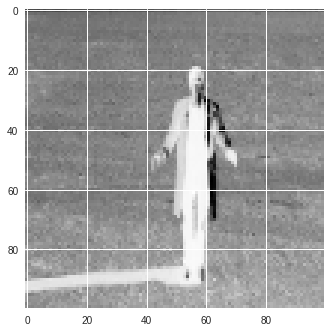

In [0]:

plt.imshow(p[23][2][0])

In [0]:

np.save("person", p)

In [0]:
ls

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
ls

In [0]:
model_file = drive.CreateFile({'title' : 'person.npy'})
model_file.SetContentFile('person.npy')
model_file.Upload()

In [0]:
np.save("label",label)

In [0]:
model_file = drive.CreateFile({'title' : 'label.npy'})
model_file.SetContentFile('label.npy')
model_file.Upload()

In [0]:
p=np.load('person.npy')

In [0]:
p1=np.array(p)

In [0]:
p1.shape

(150, 4)

In [0]:
len(p1[1][0])

415

In [0]:
405/15

27.0

In [0]:
k=p1[1][2]

In [0]:
k = k[0:375]

In [0]:
type(p1[1][0])

list

In [0]:
p1[1][0]= p1[1][0][0:405]

In [0]:

k=np.reshape(p1[1][0], (27,15,100,100))

In [0]:
train=[]
depth=30
for vid in range(150):
  for part in range(4):
    frames=len(p1[vid][part])
    frames = frames - (frames%depth)
    p1[vid][part] =  p1[vid][part][0:frames]
    n = frames/depth
    k=np.reshape(p1[vid][part], (int(n),depth,50,50))
    train.append(k)

In [0]:
label = [0,0,0,0,1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4,5,5,5,5]*25
  

In [0]:
p1 = 0
p=0

In [0]:
y

[1, 1, 1, 1, 1]

In [0]:
len(train)

600

In [0]:
len(train[1])

22

In [0]:
x=[]
y=[]
for i in range(600):
  n=len(train[i])
  for j in range(n):
    x.append(train[i][j])
  y+=[label[i]]*n


In [0]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution3D, MaxPooling3D
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
train = 0

In [0]:
x = np.array(x)

In [0]:

x.shape

(9398, 30, 50, 50)

0.0

In [0]:
x = np.reshape(x,(9398,30,50,50,1))

In [0]:
y = keras.utils.to_categorical(y, num_classes=None)

In [0]:
xtrain, xtest, ytrain,ytest =  train_test_split(x, y, test_size=0.2, random_state=4)


In [0]:
x=0
train =0
p=0
p1=0

In [0]:
xtrain, xvali, ytrain,yvali = train_test_split(xtrain, ytrain, test_size=0.2, random_state=4)

In [0]:
len(xvali)

1504

In [0]:
batch_size = 2
nb_classes = 6
nb_epoch =50

nb_filters = [32, 32]
nb_pool = [2, 2]
nb_conv = [3,3]

In [0]:
nb_filters[0]

32

In [0]:
xtrain = xtrain/255.


In [0]:
xtrain[0]

In [0]:
xtest =  xtest/255.


In [0]:

xvali = xvali/255.

In [0]:
import glob, os


In [0]:
a=glob.glob("*.avi")

In [0]:
for i in a:
  os.remove(i)

In [0]:
a = ['boxing.zip',       'handwaving.zip'  ,  'running.zip'   , 'walking.zip.1',
'boxing.zip.1'       , 'handwaving.zip.1' , 'running.zip.1',
'handclapping.zip'  ,  'jogging.zip'       ,
'handclapping.zip.1'  ,'jogging.zip.1'   ,  'walking.zip']


In [0]:
ls

sample_data/


In [0]:

# normalize train
model = Sequential()
keras.layers.Convolution3D(32, (3,3,3), strides=(1, 1, 1), padding='valid', data_format=None, dilation_rate=(1, 1, 1), activation='relu', input_shape=(30,50,50,1))
model.add(MaxPooling3D(pool_size=(nb_pool[0], nb_pool[0], nb_pool[0])))
model.add(Convolution3D(64,(3,3,3),activation='relu'))
model.add(MaxPooling3D(pool_size=(nb_pool[0], nb_pool[0], nb_pool[0])))
model.add(Convolution3D(32,(3,3,3),activation='relu'))
model.add(MaxPooling3D(pool_size=(nb_pool[0], nb_pool[0], nb_pool[0])))

#model.add(Dropout(0.7))

model.add(Flatten())

model.add(Dense(1024, init='normal', activation='relu'))

model.add(Dropout(0.8))

model.add(Dense(nb_classes,init='normal'))

model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')
hist = model.fit(xtrain, ytrain, validation_split=0.2,batch_size=batch_size,nb_epoch = nb_epoch,verbose=1,shuffle=True)



score = model.evaluate(xtest, ytest, batch_size=batch_size)
print('Test score:', score[0])
print('Test accuracy:', score[1]) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1024, activation="relu", kernel_initializer="normal")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(6, kernel_initializer="normal")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 6014 samples, validate on 1504 samples
Epoch 1/50
6014/6014 [==============================] - 47s 8ms/step - loss: 1.2639 - val_loss: 1.0464
Epoch 2/50
6014/6014 [==============================] - 44s 7ms/step - loss: 1.0825 - val_loss: 0.9816
Epoch 3/50
6014/6014 [==============================] - 44s 7ms/step - loss: 1.0190 - val_loss: 0.9440
Epoch 4/50
6014/6014 [==============================] - 44s 7ms/step - loss: 0.9764 - val_loss: 0.9532
Epoch 5/50
6014/6014 [==============================] - 44s 7ms/step - loss: 0.9532 - val_loss: 0.9144
Epoch 6/50
6014/6014 [==============================] - 44s 7ms/step - loss: 0.8953 - val_loss: 0.9111
Epoch 7/50
6014/6014 [==============================] - 45s 8ms/step - loss: 0.8786 - val_loss: 0.8646
Epoch 8/50
6014/6014 [==============================] - 45s 7ms/step - loss: 0.8594 - val_loss: 0.8436
Epoch 9/50
6014/6014 [==============================] - 44s 7ms/step - loss: 0.8314 - val_loss: 0.8190
Epoch 10/50
6014/6014 [==

IndexError: ignored

In [0]:
score*100

96.14446384297825